# This the first part of a multi part project to create an anlytical model that will identify the best zip codes for real estate investing in single family residences.   

# This first project is the first capstone in the Thinkful Data Science Course. 


## Context & Description of the Data

In real estate investing there are two predominate paths for ivnesting: flipping or buy and hold.  Flipping, defined by selling a property within one year of purchase, has made many headlines in the past years.  Mostly due to the popularity of shows on Brazo or HGTV but notorisously from being the bubble that burst and caused the 2008 market crash.  A lesser known but still popular investing strategy, is the buy and hold strategy.  While this investment type doesn't make for good television, it does make for great additions to ones investment portfolio.  As most good analysis projects, this project began with a single question: "As I look to invest in rental properties, which zip codes are the best ones for buy and hold investment properties?"

I started by researching data sets and found that Zillow offers data sets on real estate and within those data sets, offers rental data on single family residences (SFR) [https://www.zillow.com/research/data/].  As I live in Houston, I selected the Houston Metro Area market information.  This dataset included monthly rent per square foot information on 31 cities and 111 zip codes between March 2010 and April 2019.  

First challenges involved munging the dataset as the original .csv format did not lend itself well for any analysis.  Several introductory techniques were tried and tested (although after two weeks of wrestling the data, I use the term 'introductory' facetiously.  It was torture). The original data set included 5,200 data points of rents per squarefoot over a 10 year period among 111 zip codes and within 31 cities.  After long nights, countless sessions with my mentor and pestering my data scientist friends, I was able to transform the data using the df.melt function and pd.crosstab function.  I eliminated columns, transformed objects such as Zip into a string and Date into a Date-Time format, separating fields and finally eliminated all rows where rents were zero.   Following are the summary statistics on rents per square foot by zip code: 

<div class="alert alert-block alert-info">

  <b>SUMMARY STATISTICS ON RENT per SQ FT BY ZIP CODE</b>              
    
-  Maximum RentpSQFT Per Zip Code $1.71

-  Minimum RentpSQFT Per Zip Code $0.63

-  Mean RentpSQFT Per Zip Code $0.93

-  Median RentpSQFT Per Zip Code $0.86

-  Standard Deviation of RentpSQFT Per Zip Code 0.2
</div>
    
To put context around the summary statistics suppose that SFRs in the Houston Metro range between 1,700 to 2,400 sq ft. basis the summary statistics, the average monthly rent an investor could expect would be between $1,581 to $2,232 +/- 20%.  If the average purchase price of an SFR is $280,000 then an investor could expect to charge between $1,581 to $2,232 on an property with a monthly mortgage payment of $1,336.  Now that 20% standard deviation really means more if the property is in the lower bound of the square footage and competes with alternatives for rentals. 

A cursory look at the data over time would show an investor that rents per sq ft have increased overtime and that the percent change in rents over time has stabilized.  

<img scr="all_datamean_lineplot.png">

<img scr="all_datachange_lineplot.png">

The better understand the summary statistics and peel back another layer, I visualized the rents per sq ft.  The first pass was to visually see the distribution of the data.  In doing so, I noticed that data was not normally distributed, but rather appeared to have a poisson distribution.   My second plot, which was to see rents per sq ft over time by zip code hinted to as to why perahps the distribution of the data might not be a normal distribution: missing data points over the course of time.  

<img src="data_distribution1.png">

<img src="all_data_lineplot.png">

I then looked at the dispersion of rents per sq ft across time and saw that the ranges between rent prices did not have a central tendancy across the population but for some zip codes, did appear to have a central tendancy. 

<img src="scatter_by_zip.png">

Ultimately what may be an issue to resolve later on and part of my recommendations will be to solve the missing data point.  As from what the next chart shows, is a major issue if any model from this data set will be of use.

<img src="zeroes_chart.png">

## Ask & Answer: What Made Me Curious?

Looking at the rent per square foot by zip over time, I asked my self if the data would trend differently if we looked at the percent change in rents over time.  The data set uses only nominal values so I added another column into the dataframe that calculated the month over month percentage change in rent per square foot by zip code.  This data allows for a better perspecive of the changes in rents over time and will help compare the zip codes from an investment perspective.  Following are the summary statistics on the percent change in rents per square foot: 

<div class="alert alert-block alert-info">
  
  <b>SUMMARY STATISTICS ON % CHANGE IN RENTS BY ZIP CODE</b>         

-  Maximum Pct Change Per Zip Code 17.9%

-  Minimum Pct Change Per Zip Code -17.9%

-  Mean Pct Change Per Zip Code 0.2%

-  Median Pct Change Per Zip Code 0.03%

-  Standard Dev of Pct Change Per Return Per Zip Code 0.03
</div>

My expectation was that the percent change would at least beat the inflation rate however this was not the case.  Overall, across the 111 zip codes, changes in rent prices per square foot have remained flat over the past 9 years leading me to conclude that there are plenty of alternatives for living in the metro area which is not allowing for large changes in rental charges.  Again, intially.  I then plotted both the rent per sq ft by zip as well as the percent change and unlike the nominal values, these values did appear to have central tendancy.

<img src="pct_change_alldata_lineplot.png">

Another question I asked is which zip code rents were furthest from the mean rents and by how much.  So I created another dataframe to calculate the mean rent per square foot for each zip code and then subtracted that mean rent per square foot from the population mean rent per square foot and plotted the deltas as shown in the chart below:

<img src="diff2mean_lineplot.png">

Most of the delta data points fall between +$0.20 and -$0.10 rent per square foot.  This helped highlight that while the distribution of the rents per square foot may not have a normal distribution, there is some type of central tendancy within the population data set.  I wondered if the missing data points within the population data could be having an effect on the analysis so I decided to perform a difference of means test.   

Because I wanted to test whether or not the missing data elements were affecting the population mean, I decided to gather my test sample from a time frame where I knew there were no missing data points: 2018-06 to present.  First I created a sample data set taking only data from a time sample I knew was complete: May 2018 to present. I created this dataset and then plotted both the mean rent per sq ft and the percent change in rent over time to see if there was a visual difference in the trend lines. 

<img src="non_zeromean_lineplot.png">

<img src="non_zeropctc_lineplot.png">

Then I randomly sampled 50% of this data set and compared that to 50% of the population data set prior to 2017 (where I knew at least 40% of the data had missing data points). The results of the difference of means test were: 

<div class="alert alert-block alert-info">
    
  <b>DIFFERENCE OF MEANS TEST ON RENT per SQ FT POPULATION VS NON-MISSING DATA SAMPLE</b>      

-  Diff of Means 0.045858342

-  Standard Error of the Differences 0.018158093

-  Ttest Result statistic=3.5259447915444118

-  P Value=0.00045246184210405264)
</div>


The results determined that the means are not statistically different and while the population data set is missing data elements, further statistical analysis and model building could be done using the population dataset.  


## Recommendations For Further Research:

1. Solve the missing data points issue to improve the overall dataset to determine if there are zip codes that truly are significantly different from the mean
2. Plot a geo heat map using the rent per sq ft and difference to the mean to visually show the zipcodes commanding the highest rents. 


### Shafiq Jadallah

In [55]:
!pwd

/Users/sjadallah/Desktop/Thinkful_data


In [2]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
from pylab import rcParams
import datetime as dt 
from scipy.stats import ttest_ind
%matplotlib inline


In [3]:
df = pd.read_csv('Capstone 1/Houston_ONLY_rentalpricepersqft_zip_SFR.csv')

In [4]:
df.head()

,Zip_Code,City,State,CountyName,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,...,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04
0,77494,Katy,TX,Harris County,0,0,0,0,0,0,...,0.857527,0.846775,0.832379,0.837617,0.841398,0.867679,0.857014,0.868657,0.867712,0.863641
1,77449,Katy,TX,Harris County,0,0,0,0,0,0,...,0.838150,0.833333,0.825406,0.826218,0.831019,0.843002,0.845547,0.843308,0.846532,0.856938
2,77084,Houston,TX,Harris County,0,0,0,0,0,0,...,0.813587,0.820545,0.814306,0.804661,0.806979,0.809061,0.808566,0.825602,0.832616,0.831748
3,77573,League City,TX,Galveston County,0,0,0,0,0,0,...,0.980250,0.979835,0.974817,0.961861,0.946893,0.942097,0.943396,0.956525,0.966221,0.986377
4,77584,Pearland,TX,Brazoria County,0,0,0,0,0,0,...,0.846998,0.836670,0.844493,0.853375,0.853375,0.862832,0.871860,0.856174,0.859389,0.886167


In [5]:
#It would appear there are zeros in the data, so this will be a first look at the potential for a zero-inflation problem in the data. 

date_column_list = df.columns[4:]  #This looks at the list of columns in the dataframe, excluding the first four items
dates_df = df[date_column_list]    #Creates a new dataframe with only the list of the date columns
dates_df.head()                   


,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,...,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04
0,0,0,0,0,0,0,0,0,0,0,...,0.857527,0.846775,0.832379,0.837617,0.841398,0.867679,0.857014,0.868657,0.867712,0.863641
1,0,0,0,0,0,0,0,0,0,0,...,0.838150,0.833333,0.825406,0.826218,0.831019,0.843002,0.845547,0.843308,0.846532,0.856938
2,0,0,0,0,0,0,0,0,0,0,...,0.813587,0.820545,0.814306,0.804661,0.806979,0.809061,0.808566,0.825602,0.832616,0.831748
3,0,0,0,0,0,0,0,0,0,0,...,0.980250,0.979835,0.974817,0.961861,0.946893,0.942097,0.943396,0.956525,0.966221,0.986377
4,0,0,0,0,0,0,0,0,0,0,...,0.846998,0.836670,0.844493,0.853375,0.853375,0.862832,0.871860,0.856174,0.859389,0.886167


In [6]:
#Count the number of zeros in each column, create a row for the total number of zeros and examine it. 

dates_df.loc['Total_Zeros',:]= dates_df[dates_df==0].count(axis=0)   #Establish a rows with Total Zeros counted on the bottom
dates_df.tail()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,...,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04
107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.928257,0.942170,0.942170,0.903972,0.907307,0.910643,0.899869,0.910029,0.925926,0.957358
108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.348891,1.338798,1.318994,1.296887,1.272085,1.246537,1.235030,1.237705,1.277232,1.323944
109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.191354,1.194571,1.229774,1.181592,1.179974,1.192737,1.205400,1.219512,1.236249,1.272624
110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.953053,0.903535,0.911252,0.939920,0.950932,0.968748,0.954190,0.989148,1.007787,0.947867
Total_Zeros,111.0,111.0,111.0,111.0,111.0,111.0,111.0,111.0,111.0,111.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


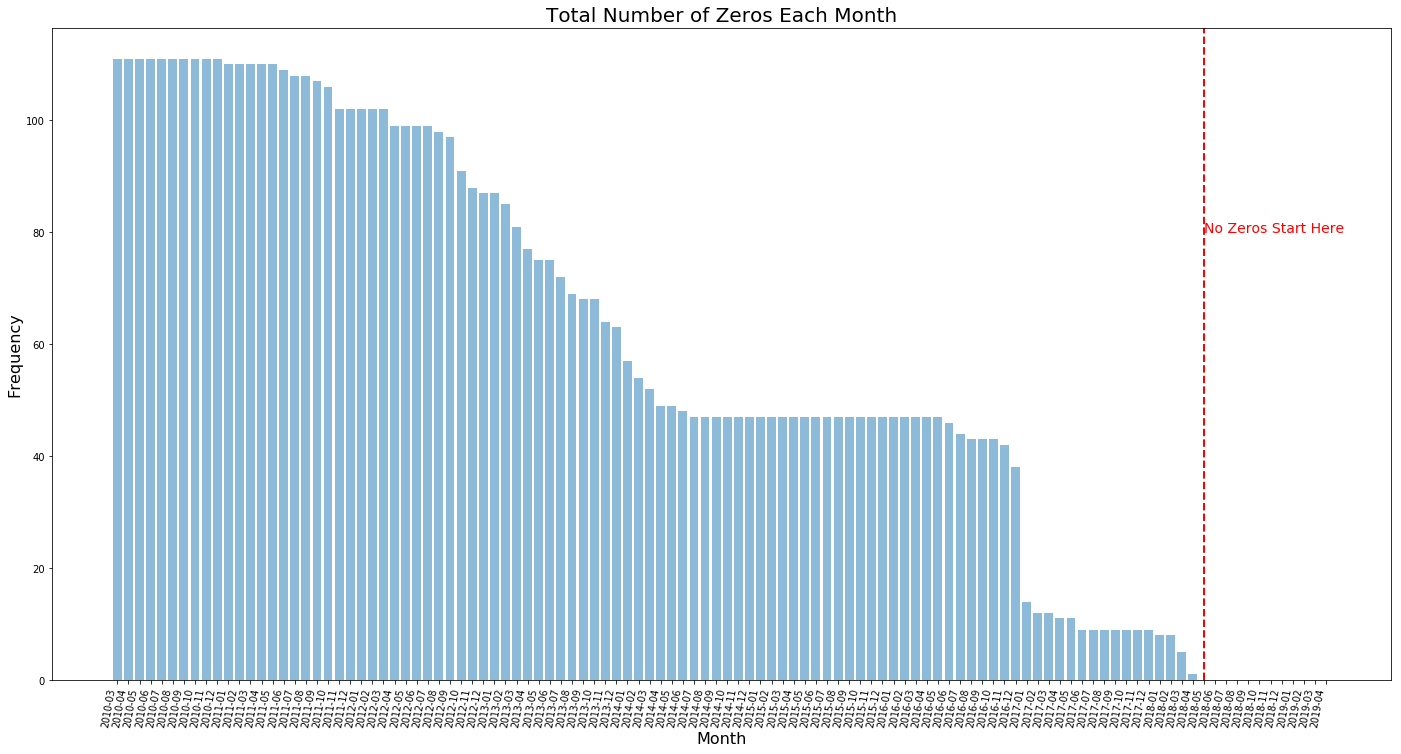

In [7]:
#Look at a graph of the zeros per date. It would appeare there is a zero inflation problem in the data.
#A cuttoff date may need to be established to model the data later. 

#Convert total zeros to a list
list_total_zeros = dates_df.loc[dates_df.index =='Total_Zeros'].values.flatten().tolist() 

y = list_total_zeros
x = date_column_list

plt.rcParams["figure.figsize"] = (24,12)
plt.bar(x, y, align = 'center', alpha = 0.5)
plt.xticks(rotation=80, ha='right', fontsize = 9.5)
plt.title("Total Number of Zeros Each Month", fontsize=20)
plt.ylabel("Frequency", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.axvline(x='2018-05',color='red',linewidth = 2,linestyle = '--')
plt.text('2018-05', 80, 'No Zeros Start Here'.format(), color = 'red', fontsize=14)
plt.savefig('zeroes_chart.png')
plt.show()


In [8]:
#melt the dataframe to move from wide to long 
df_melted = df.melt(id_vars = ['Zip_Code', 'City', 'State', 'CountyName'], var_name = 'Date', value_name = 'RentpSQFT')
df_melted['Zip_Code'] = df_melted['Zip_Code'].astype(str)
df_melted.head()

,Zip_Code,City,State,CountyName,Date,RentpSQFT
0,77494,Katy,TX,Harris County,2010-03,0.0
1,77449,Katy,TX,Harris County,2010-03,0.0
2,77084,Houston,TX,Harris County,2010-03,0.0
3,77573,League City,TX,Galveston County,2010-03,0.0
4,77584,Pearland,TX,Brazoria County,2010-03,0.0


In [9]:
# dropping zip code, state and city from data frame
df_melted.drop(['State', 'CountyName'], axis =1, inplace=True)  

# making separate year column from new data frame 
df_melted["Year"]= df_melted["Date"].str.split('-', n=1, expand = True)[0]
  
# making separate month column from new data frame 
df_melted["Month"]= df_melted["Date"].str.split('-', n=1, expand = True)[1]

# Delete all rows from dataFrame df_melted where RentpSQFT = 0
df_melted = df_melted[df_melted.RentpSQFT != 0]

# converting Date column to date-time format
df_melted['Date'] =  pd.to_datetime(df_melted['Date'])

df_melted.head()

,Zip_Code,City,Date,RentpSQFT,Year,Month
1111,77449,Katy,2011-01-01,0.638339,2011,01
1222,77449,Katy,2011-02-01,0.674576,2011,02
1333,77449,Katy,2011-03-01,0.692935,2011,03
1444,77449,Katy,2011-04-01,0.660772,2011,04
1555,77449,Katy,2011-05-01,0.678970,2011,05


In [10]:
#get unique count of zip codes
df_melted['Zip_Code'].nunique()

111

In [11]:
#append dataframe to include MoM percent change in rents per sq ft
#group dataframe by Zip Code
df_melted["Pct Change"] = df_melted.groupby('Zip_Code')['RentpSQFT'].pct_change(fill_method='ffill')
df_melted.head()

,Zip_Code,City,Date,RentpSQFT,Year,Month,Pct Change
1111,77449,Katy,2011-01-01,0.638339,2011,01,NaN
1222,77449,Katy,2011-02-01,0.674576,2011,02,0.056768
1333,77449,Katy,2011-03-01,0.692935,2011,03,0.027215
1444,77449,Katy,2011-04-01,0.660772,2011,04,-0.046415
1555,77449,Katy,2011-05-01,0.678970,2011,05,0.027539


In [12]:
#First pass at summary stats on dataset
df_melted.describe()

,RentpSQFT,Pct Change
count,5927.000000,5816.000000
mean,0.927649,0.001666
std,0.195086,0.029366
min,0.629496,-0.179036
25%,0.800815,-0.012990
50%,0.863716,0.000283
75%,0.975171,0.016151
max,1.710327,0.178531


In [65]:
#Summary stats on rent per sq ft by Zip Code
maximum = round(df_melted['RentpSQFT'].max(),2)
minimum = round(df_melted['RentpSQFT'].min(),2)
mean = round(df_melted['RentpSQFT'].mean(),2)
median = round(df_melted['RentpSQFT'].median(),2)
standardDev = round(df_melted['RentpSQFT'].std(),2)

maximumP = round(df_melted['Pct Change'].max(),3) * 100
minimumP = round(df_melted['Pct Change'].min(),3) * 100
meanP = round(df_melted['Pct Change'].mean(),3) * 100
medianP = round(df_melted['Pct Change'].median(),4) * 100
standardDevP = round(df_melted['Pct Change'].std(),2)

print("------------------------------------------------------------")
print("    SUMMARY STATISTICS ON RENT P SQ FT BY Zip Code              ")
print("------------------------------------------------------------")
print("Maximum RentpSQFT Per Zip Code ${}".format(maximum))
print("Minimum RentpSQFT Per Zip Code ${}".format(minimum))
print("Mean RentpSQFT Per Zip Code ${}".format(mean))
print("Median RentpSQFT Per Zip Code ${}".format(median))
print("Standard Deviation of RentpSQFT Per Zip Code {}".format(standardDev))
print("------------------------------------------------------------")
print("    SUMMARY STATISTICS ON % CHANGE IN RENTS BY Zip Code         ")
print("------------------------------------------------------------")
print("Maximum Pct Change Per Zip Code {}%".format(maximumP))
print("Minimum Pct Change Per Zip Code {}%".format(minimumP))
print("Mean Pct Change Per Zip Code {}%".format(meanP))
print("Median Pct Change Per Zip Code {}%".format(medianP))
print("Standard Dev of Pct Change Per Return Per Zip Code {}".format(standardDevP))

------------------------------------------------------------
    SUMMARY STATISTICS ON RENT P SQ FT BY Zip Code              
------------------------------------------------------------
Maximum RentpSQFT Per Zip Code $1.71
Minimum RentpSQFT Per Zip Code $0.63
Mean RentpSQFT Per Zip Code $0.93
Median RentpSQFT Per Zip Code $0.86
Standard Deviation of RentpSQFT Per Zip Code 0.2
------------------------------------------------------------
    SUMMARY STATISTICS ON % CHANGE IN RENTS BY Zip Code         
------------------------------------------------------------
Maximum Pct Change Per Zip Code 17.9%
Minimum Pct Change Per Zip Code -17.9%
Mean Pct Change Per Zip Code 0.2%
Median Pct Change Per Zip Code 0.03%
Standard Dev of Pct Change Per Return Per Zip Code 0.03


/usr/local/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


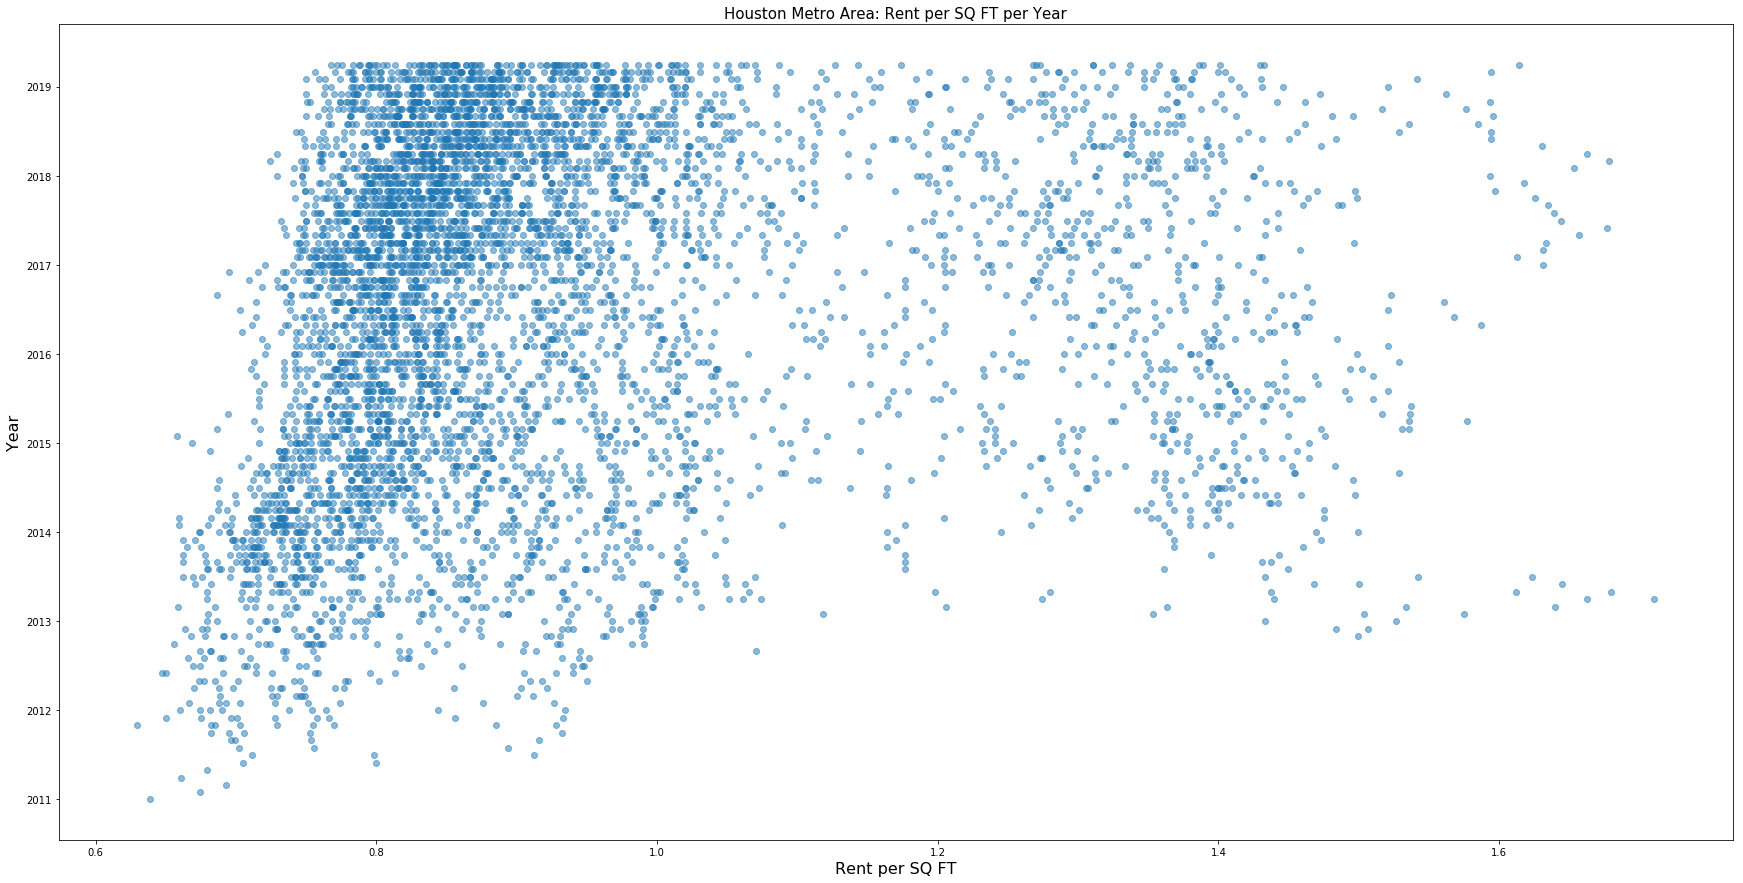

In [14]:
#create scatter plot to see rents over time

plt.rcParams["figure.figsize"] = [30,15]
y = df_melted['Date']
x = df_melted['RentpSQFT']
plt.scatter(x,y, alpha = 0.5)
plt.title("Houston Metro Area: Rent per SQ FT per Year", fontsize=15)
plt.ylabel("Year", fontsize=16)
plt.xlabel("Rent per SQ FT", fontsize=16)
plt.savefig('alldata_scatter.png')
plt.show()

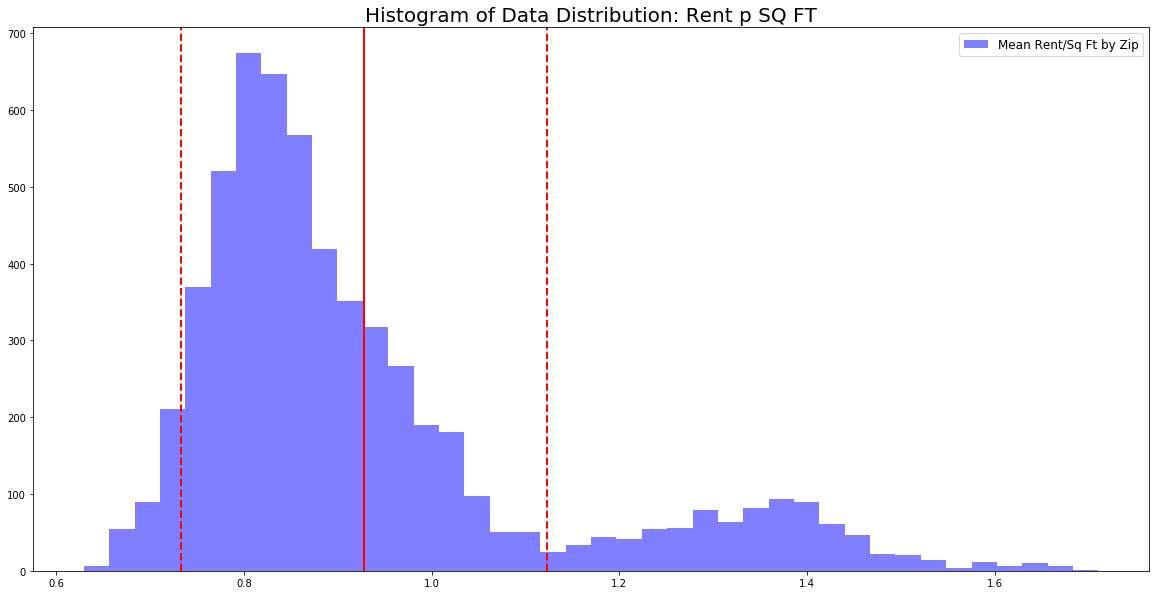

In [71]:
#plot the dataset to see data distribution
plt.rcParams["figure.figsize"] = (20,10)
plt.hist(df_melted['RentpSQFT'], bins = 40, alpha=0.5, color = 'b', label='Mean Rent/Sq Ft by Zip') 

#Add a vertical lines at the mean and +/- 1 std dev
plt.axvline(df_melted['RentpSQFT'].mean(), color='r', linestyle='solid', linewidth=2)
plt.axvline(df_melted['RentpSQFT'].mean() + df_melted['RentpSQFT'].std(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(df_melted['RentpSQFT'].mean() - df_melted['RentpSQFT'].std(), color='r', linestyle='dashed', linewidth=2)
plt.title('Histogram of Data Distribution: Rent p SQ FT', fontsize = 20)
plt.legend(loc='upper right', fontsize=12) 
plt.savefig('data_distribution1.png')
plt.show()

In [16]:
#Convert the zip codes to column values and order them by date to visualize 

rows        = df_melted['Zip_Code']  #Set the rows by Zip_Code
columns     = df_melted['Date']      #Set the columns to be the Date
values      = df_melted['RentpSQFT'] #This is the value to capture

aggregation = 'mean'                 #This is a formatliy because there is only one value per Date and Zip Code.
                                     #Therefore there is nothing to add, average, etc.
                                     #But if you don't give it an aggregation function, it will throw an error.

df_cross = df_melted[df_melted.RentpSQFT != 0]
df_cross = pd.crosstab(columns,rows, values,aggfunc=aggregation,dropna=True)
df_cross['Mean'] = df_cross.mean(axis=1)
df_cross['St Dev'] = df_cross.std(axis=1)   
df_cross['Pct Change'] = df_cross['Mean'].pct_change(fill_method='ffill')
df_cross.head()

Zip_Code,77003,77004,77005,77006,77007,77008,77009,77014,77018,77019,...,77573,77578,77581,77583,77584,77586,77590,Mean,St Dev,Pct Change
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.638339,0.0,NaN
2011-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.674576,0.0,0.056768
2011-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.692935,0.0,0.027215
2011-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.660772,0.0,-0.046415
2011-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.678970,0.0,0.027539


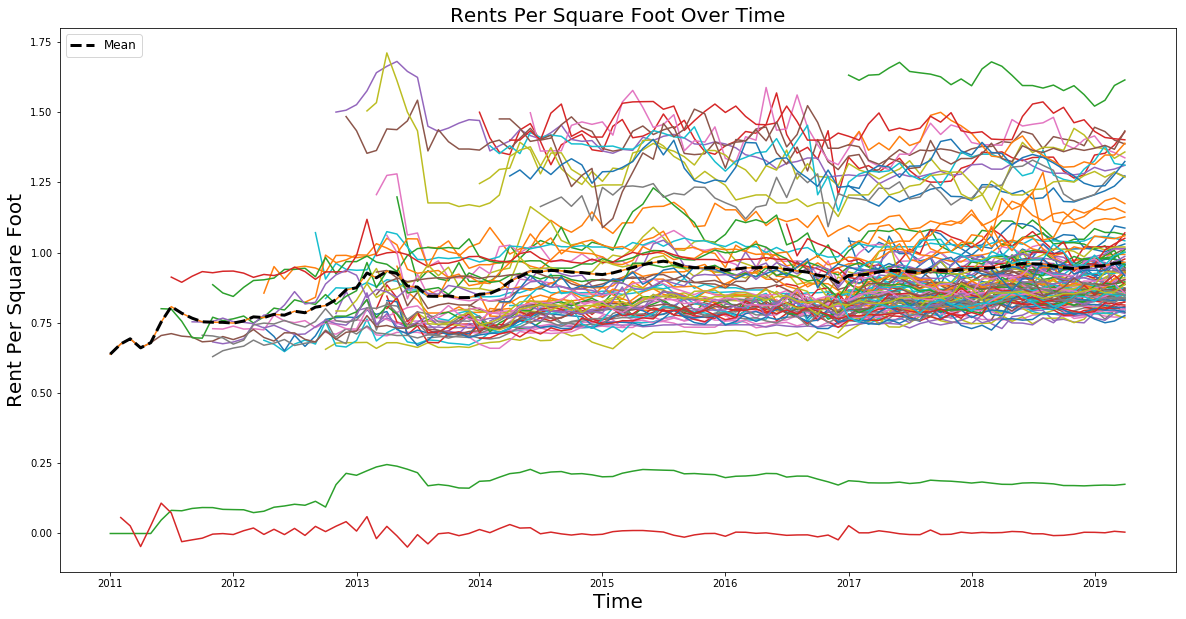

In [17]:
#plot the entire dataset to see nominal rent per sq ft
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(df_cross)
plt.plot(df_cross['Mean'], color='black',linewidth = 3,linestyle = '--')
plt.title('Rents Per Square Foot Over Time', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Rent Per Square Foot', fontsize=20)
plt.legend(loc='upper left', fontsize=12)
plt.savefig('all_data_lineplot.png')
plt.show()

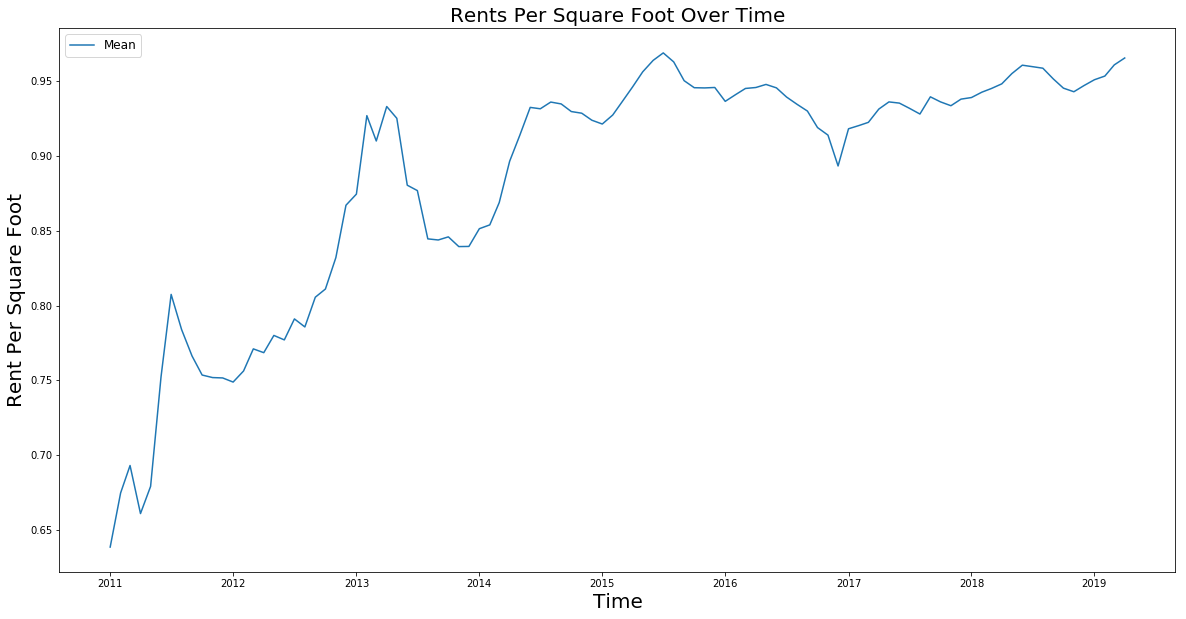

In [18]:
#plot the entire dataset to see nominal rent per sq ft
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(df_cross['Mean'])
plt.title('Rents Per Square Foot Over Time', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Rent Per Square Foot', fontsize=20)
plt.legend(loc='upper left', fontsize=12)
plt.savefig('all_datamean_lineplot.png')
plt.show()

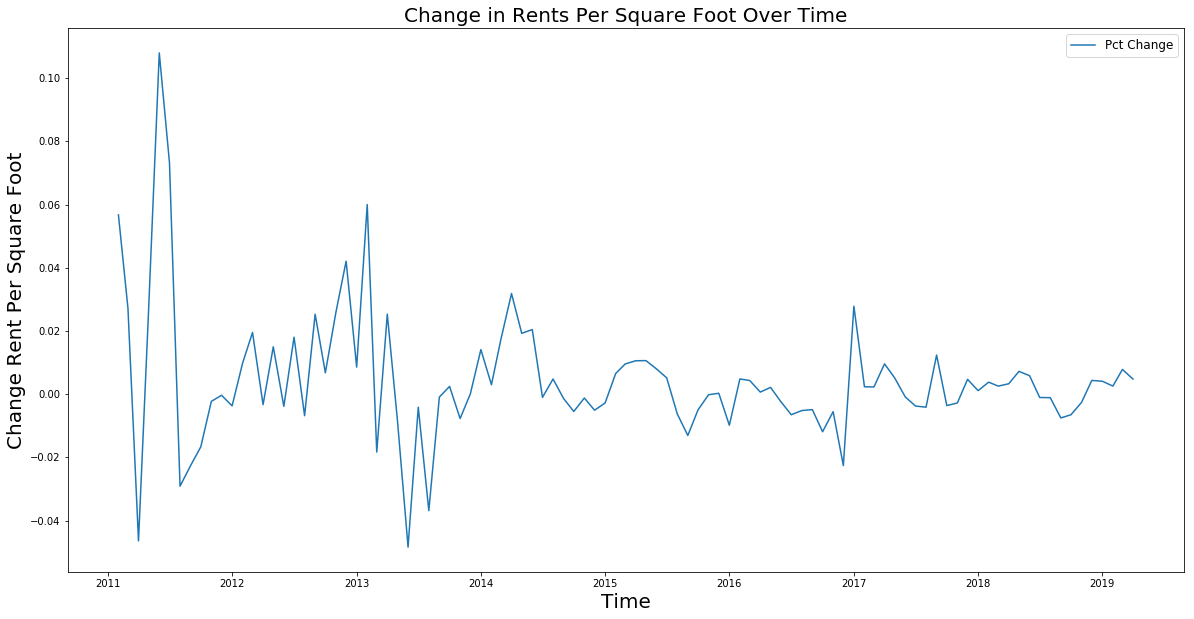

In [69]:
#plot the entire dataset to see nominal rent per sq ft
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(df_cross['Pct Change'])
plt.title('Change in Rents Per Square Foot Over Time', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Change Rent Per Square Foot', fontsize=20)
plt.legend(loc='upper right', fontsize=12)
plt.savefig('all_datachange_lineplot.png')
plt.show()

In [19]:
#Get rid of the zero data columns

df_non_zero = df_cross.copy()
df_non_zero = df_non_zero.dropna()
df_non_zero['Mean'] = df_non_zero.mean(axis=1)
df_non_zero['St Dev'] = df_non_zero.std(axis=1)
df_non_zero['Pct Change'] = df_non_zero['Mean'].pct_change(fill_method='ffill')
df_non_zero.head()

Zip_Code,77003,77004,77005,77006,77007,77008,77009,77014,77018,77019,...,77573,77578,77581,77583,77584,77586,77590,Mean,St Dev,Pct Change
Date,,,,,,,,,,,,,,,,,,,,,
2018-05-01,1.209190,1.182432,1.630557,1.337611,1.316389,1.390882,1.473122,0.822892,1.318397,1.310861,...,0.988353,0.933908,0.911166,0.860047,0.857853,0.960898,0.864919,0.940043,0.207572,NaN
2018-06-01,1.220777,1.167181,1.594203,1.326691,1.332091,1.431127,1.450116,0.825871,1.392014,1.273097,...,0.996314,0.915605,0.920563,0.870395,0.862069,0.973091,0.907579,0.945597,0.211952,0.005908
2018-07-01,1.191354,1.132075,1.594203,1.338028,1.308155,1.421041,1.456311,0.855746,1.355712,1.283594,...,0.980250,0.904814,0.955110,0.882688,0.846998,0.973091,0.907731,0.944579,0.212927,-0.001077
2018-08-01,1.194571,1.113914,1.585248,1.339038,1.290732,1.369344,1.461554,0.830273,1.374346,1.364437,...,0.979835,0.847477,0.933281,0.905665,0.836670,0.976100,0.979167,0.943544,0.211595,-0.001095
2018-09-01,1.229774,1.137513,1.595823,1.339421,1.282051,1.412397,1.481111,0.810127,1.373904,1.275571,...,0.974817,0.856394,0.918079,0.857143,0.844493,1.029410,0.938368,0.936412,0.209429,-0.007560


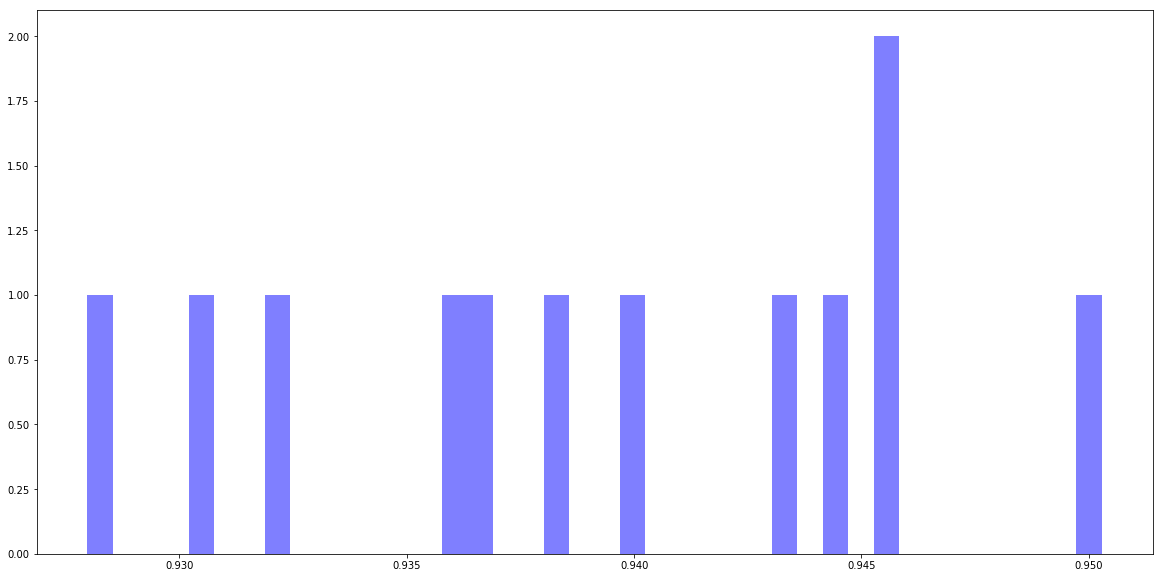

In [20]:
#plot the zip mean dataset to see data distribution with no zeros
plt.rcParams["figure.figsize"] = (20,10)
plt.hist(df_non_zero['Mean'], bins = 40, alpha=0.5, color = 'b', label='Mean Rent/Sq Ft by Zip') 
plt.savefig('zerodata_distribution.png')
plt.show()

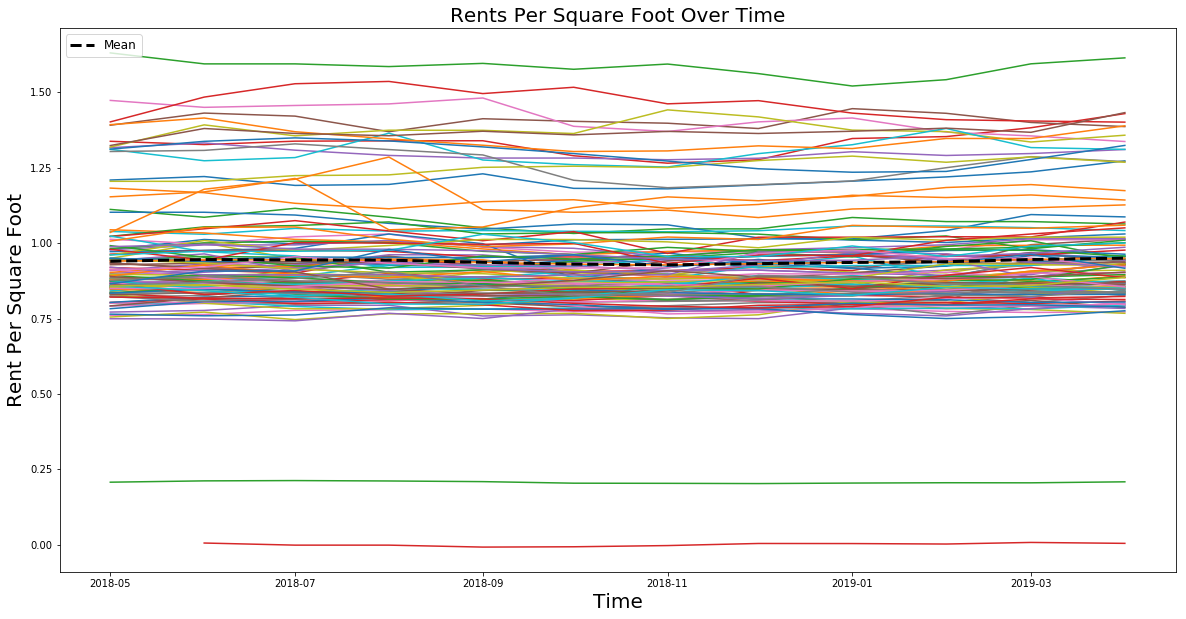

In [21]:
#plot the non zero dataset to see nominal rent per sq ft
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(df_non_zero)
plt.plot(df_non_zero['Mean'], color='black',linewidth = 3,linestyle = '--')
plt.title('Rents Per Square Foot Over Time', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Rent Per Square Foot', fontsize=20)
plt.legend(loc='upper left', fontsize=12)
plt.savefig('non_zero_lineplot.png')
plt.show()

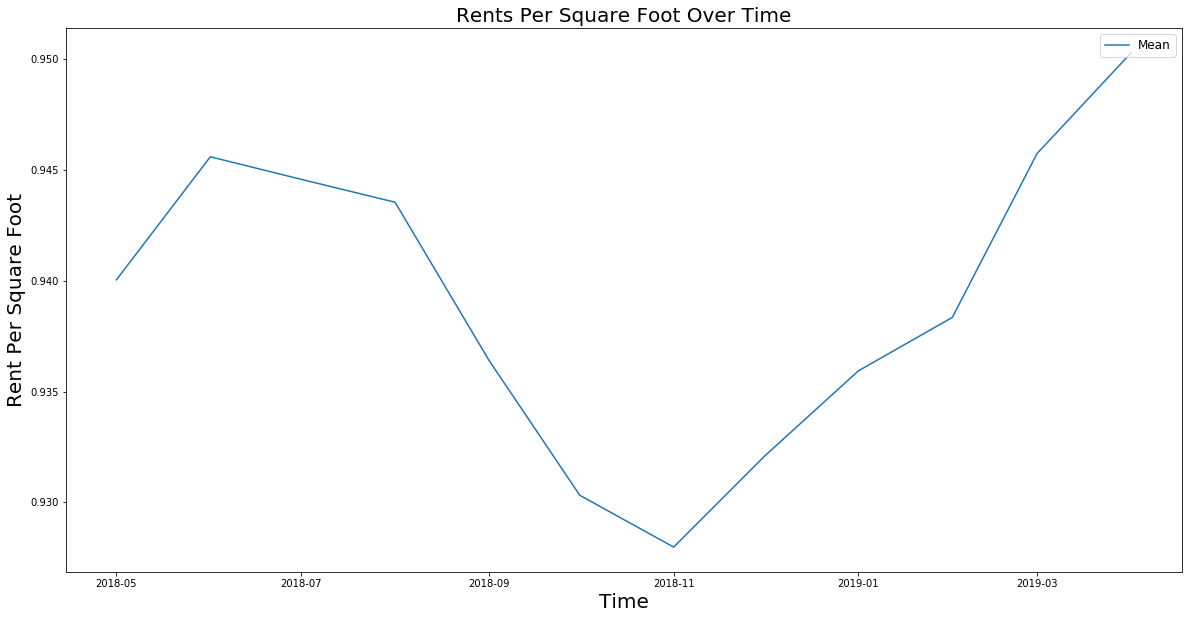

In [22]:
#plot the non zero dataset to see nominal rent per sq ft
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(df_non_zero['Mean'])
plt.title('Rents Per Square Foot Over Time', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Rent Per Square Foot', fontsize=20)
plt.legend(loc='upper right', fontsize=12)
plt.savefig('non_zeromean_lineplot.png')
plt.show()

/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


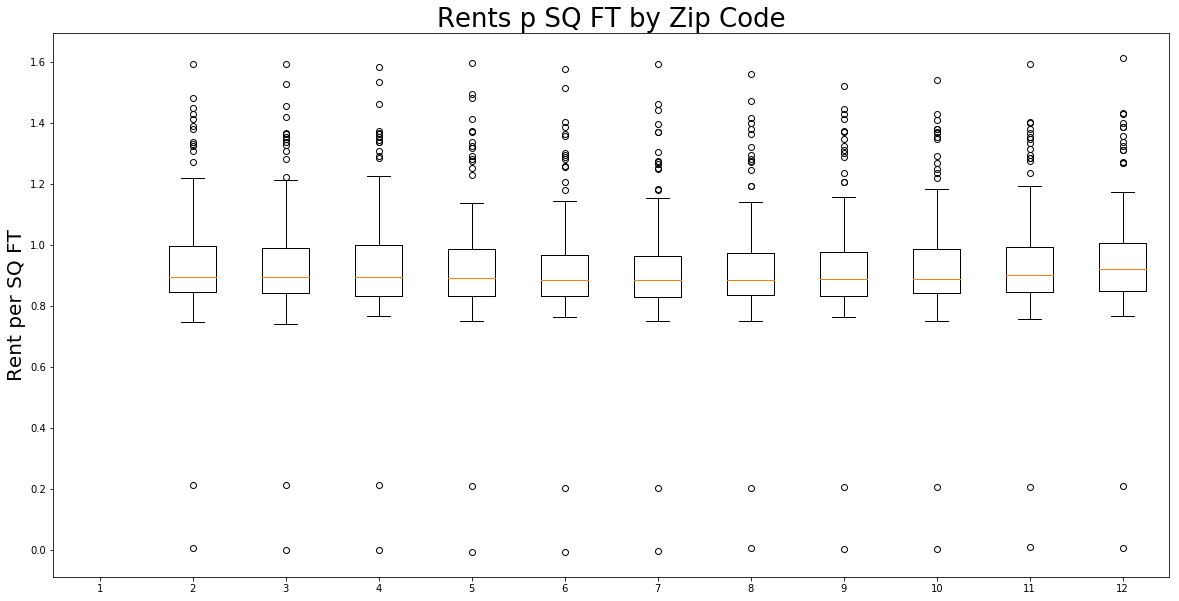

In [23]:
#boxplot of rent per sq ft by City with non zero data

plt.boxplot(df_non_zero)
plt.rcParams["figure.figsize"] = [60,30]
plt.title('Rents p SQ FT by Zip Code', fontsize=26)
plt.ylabel('Rent per SQ FT', fontsize=20)
plt.savefig('non_zero_boxplot.png')
plt.show()


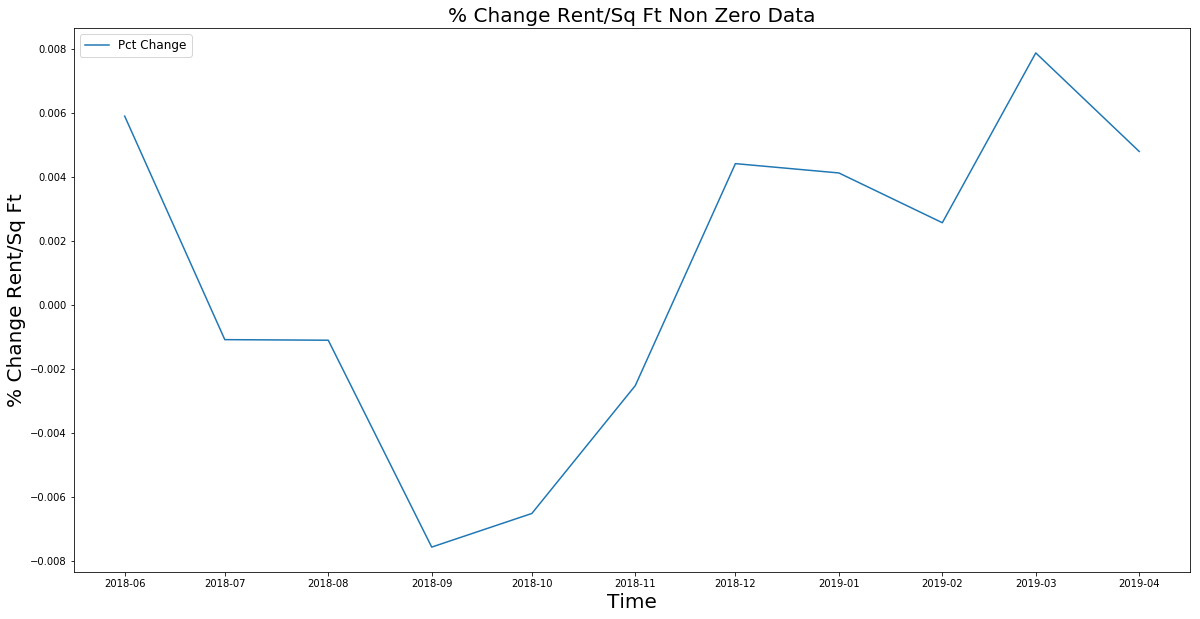

In [24]:
#plot the non zero dataset to see nominal rent per sq ft
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(df_non_zero['Pct Change'])
plt.title('% Change Rent/Sq Ft Non Zero Data', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('% Change Rent/Sq Ft', fontsize=20)
plt.legend(loc='upper left', fontsize=12)
plt.savefig('non_zeropctc_lineplot.png')
plt.show()

In [25]:
#transpose non zero dataframe into vertical format
df_non_zero = df_non_zero.drop(['Mean', 'St Dev', 'Pct Change'], axis=1)
df_non_zero = df_non_zero.transpose()
df_non_zero.tail()

Date,2018-05-01 00:00:00,2018-06-01 00:00:00,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00
Zip_Code,,,,,,,,,,,,
77581,0.911166,0.920563,0.955110,0.933281,0.918079,0.917441,0.918079,0.965975,0.977836,0.948767,0.950144,0.920917
77583,0.860047,0.870395,0.882688,0.905665,0.857143,0.825017,0.835923,0.892814,0.887435,0.864260,0.859711,0.846689
77584,0.857853,0.862069,0.846998,0.836670,0.844493,0.853375,0.853375,0.862832,0.871860,0.856174,0.859389,0.886167
77586,0.960898,0.973091,0.973091,0.976100,1.029410,1.001820,0.955414,0.955414,0.990582,0.955414,0.990259,1.000465
77590,0.864919,0.907579,0.907731,0.979167,0.938368,0.961538,0.923275,0.936599,0.936599,0.935139,0.962815,0.916649


In [50]:
#create a random sample from the population data frame with zeroes
df_poptemp = df_melted[df_melted['Year'] < '2017'].sample(frac=.5)

popsample= df_poptemp['RentpSQFT'].sample(frac=.5, replace = False)
print(len(popsample))

741


In [51]:
#create a random sample from the population data frame with zeroes
df_nztemp= df_melted[df_melted['Date'] >= '2018-06'].sample(frac=.5)

nonzerosample= df_nztemp['RentpSQFT'].sample(frac=.5, replace = False)
print(len(nonzerosample))

305


In [52]:
popsample.describe()

count    741.000000
mean       0.913148
std        0.207242
min        0.638339
25%        0.774194
50%        0.842235
75%        0.970000
max        1.639923
Name: RentpSQFT, dtype: float64

In [53]:
nonzerosample.describe()

count    305.000000
mean       0.959007
std        0.184158
min        0.752487
25%        0.836670
50%        0.888761
75%        0.985935
max        1.576293
Name: RentpSQFT, dtype: float64

In [54]:
#CLT computation of the difference of means, t-test and p-test

#CLT parameters
diff = nonzerosample.mean() - popsample.mean()
se_popsample = (popsample.std()**2/len(popsample)) ** .5
se_nonzerosample = (nonzerosample.std()**2/len(nonzerosample)) ** .5
diff_se = se_popsample + se_nonzerosample

print("------------------------------------------------------------")
print("    DIFF OF MEANS TEST ON RENT P SQ FT Zero & Non Zero      ")
print("------------------------------------------------------------")
print("Diff of Means {:.8}".format(diff))
print("Standard Error of the Differences {:.8}".format(diff_se))
print(ttest_ind(nonzerosample, popsample, equal_var=False))

------------------------------------------------------------
    DIFF OF MEANS TEST ON RENT P SQ FT Zero & Non Zero      
------------------------------------------------------------
Diff of Means 0.045858342
Standard Error of the Differences 0.018158093
Ttest_indResult(statistic=3.5259447915444118, pvalue=0.00045246184210405264)


In [31]:
#calculating mean by zip and creaet new dataframe
df_zipmean = pd.DataFrame()               #creates new dataframe for recording means by zip
for col in df_cross.columns: 
    zmean = []                            #temporary location for recording means
    zmean.append(df_cross[col].mean())    #for loop to calculate mean for each zip
    df_zipmean[col] = zmean 
    
df_zipmean.head()

,77003,77004,77005,77006,77007,77008,77009,77014,77018,77019,...,77573,77578,77581,77583,77584,77586,77590,Mean,St Dev,Pct Change
0,1.209098,1.10494,1.613985,1.367398,1.374492,1.390961,1.415577,0.804038,1.312105,1.338328,...,0.89648,0.908203,0.91168,0.849968,0.827791,0.981315,0.929222,0.886157,0.168417,0.004396


In [32]:
#transpose new dataframe into vertical format
df_zipmean = df_zipmean.transpose()
df_zipmean.columns=['Mean RentpSQFT']

In [33]:
#insert calculation of difference to mean and then sort data frame
df_zipmean['Diff to Pop Mean'] = df_zipmean['Mean RentpSQFT'] - mean
df_zipmean.sort_values(by=['Diff to Pop Mean'], ascending=False)[:10]

,Mean RentpSQFT,Diff to Pop Mean
77005,1.613985,0.683985
77027,1.459029,0.529029
77009,1.415577,0.485577
77008,1.390961,0.460961
77024,1.381794,0.451794
77007,1.374492,0.444492
77006,1.367398,0.437398
77098,1.365399,0.435399
77019,1.338328,0.408328
77018,1.312105,0.382105


In [34]:
df_zipmean.sort_values(by=['Diff to Pop Mean'], ascending=True)[:10]

,Mean RentpSQFT,Diff to Pop Mean
Pct Change,0.004396,-0.925604
St Dev,0.168417,-0.761583
77072,0.715884,-0.214116
77036,0.744829,-0.185171
77073,0.747608,-0.182392
77081,0.750366,-0.179634
77090,0.760923,-0.169077
77083,0.761128,-0.168872
77066,0.763686,-0.166314
77373,0.763864,-0.166136


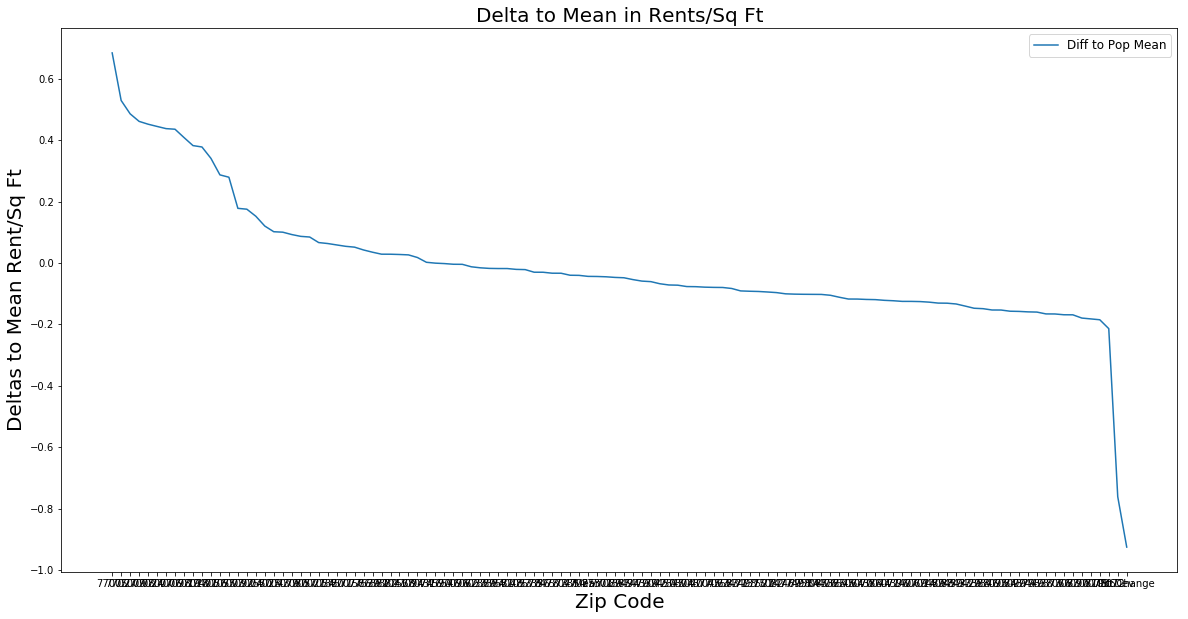

In [45]:
#create plot to see zip mean differences

plt.rcParams["figure.figsize"] = (20,10)
plt.plot(df_zipmean['Diff to Pop Mean'])
#plt.plot(df_non_zero['Mean'], color='black',linewidth = 3,linestyle = '--')
plt.title('Delta to Mean in Rents/Sq Ft', fontsize=20)
plt.xlabel('Zip Code', fontsize=20)
plt.ylabel('Deltas to Mean Rent/Sq Ft', fontsize=20)
plt.legend(loc='upper right', fontsize=12)
plt.savefig('diff2mean_lineplot.png')
plt.show()

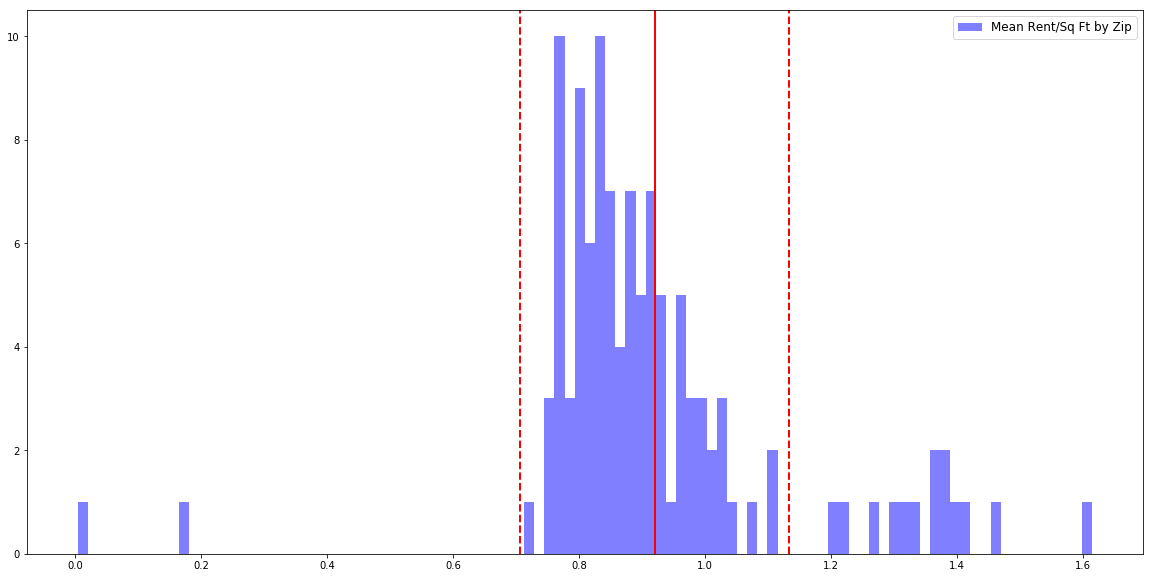

In [36]:
#plot the zip mean dataset to see data distribution
plt.rcParams["figure.figsize"] = (20,10)
plt.hist(df_zipmean['Mean RentpSQFT'], bins = 100, alpha=0.5, color = 'b', label='Mean Rent/Sq Ft by Zip') 

#Add a vertical lines at the mean and +/- 1 std dev
plt.axvline(df_zipmean['Mean RentpSQFT'].mean(), color='r', linestyle='solid', linewidth=2)
plt.axvline(df_zipmean['Mean RentpSQFT'].mean() + df_zipmean['Mean RentpSQFT'].std(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(df_zipmean['Mean RentpSQFT'].mean() - df_zipmean['Mean RentpSQFT'].std(), color='r', linestyle='dashed', linewidth=2)
plt.legend(loc='upper right', fontsize=12) 
plt.savefig('zipmean_data_distribution.png')
plt.show()

In [37]:
#transpose zipmean data frame
df_zipmean = df_zipmean.sort_values(by=['Diff to Pop Mean'], ascending=False)
df_zipmeanT = df_zipmean.T
df_zipmeanT.head()

,77005,77027,77009,77008,77024,77007,77006,77098,77019,77018,...,77373,77066,77083,77090,77081,77073,77036,77072,St Dev,Pct Change
Mean RentpSQFT,1.613985,1.459029,1.415577,1.390961,1.381794,1.374492,1.367398,1.365399,1.338328,1.312105,...,0.763864,0.763686,0.761128,0.760923,0.750366,0.747608,0.744829,0.715884,0.168417,0.004396
Diff to Pop Mean,0.683985,0.529029,0.485577,0.460961,0.451794,0.444492,0.437398,0.435399,0.408328,0.382105,...,-0.166136,-0.166314,-0.168872,-0.169077,-0.179634,-0.182392,-0.185171,-0.214116,-0.761583,-0.925604


In [38]:
#create groups for zipmean data frame
list_df_zipmeanT = list(df_zipmeanT)

group_1 = list_df_zipmeanT[:10]
group_2 = list_df_zipmeanT[11:21]
group_3 = list_df_zipmeanT[22:32]
group_4 = list_df_zipmeanT[33:43]
group_5 = list_df_zipmeanT[44:54]
group_6 = list_df_zipmeanT[55:65]
group_7 = list_df_zipmeanT[66:76]
group_8 = list_df_zipmeanT[77:87]
group_9 = list_df_zipmeanT[88:98]
group_10 = list_df_zipmeanT[99:111]

df_group1 = df_zipmeanT[group_1]
df_group2 = df_zipmeanT[group_2]
df_group3 = df_zipmeanT[group_3]
df_group4 = df_zipmeanT[group_4]
df_group5 = df_zipmeanT[group_5]
df_group6 = df_zipmeanT[group_6]
df_group7 = df_zipmeanT[group_7]
df_group8 = df_zipmeanT[group_8]
df_group9 = df_zipmeanT[group_9]
df_group10 = df_zipmeanT[group_10]


df_group1.head()

,77005,77027,77009,77008,77024,77007,77006,77098,77019,77018
Mean RentpSQFT,1.613985,1.459029,1.415577,1.390961,1.381794,1.374492,1.367398,1.365399,1.338328,1.312105
Diff to Pop Mean,0.683985,0.529029,0.485577,0.460961,0.451794,0.444492,0.437398,0.435399,0.408328,0.382105


In [39]:
#Convert the cities to column values and order them by date but now look at % change
rows        = df_melted['Zip_Code']   #Set the rows by City
columns     = df_melted['Date']       #Set the columns to be the Date
values      = df_melted['Pct Change'] #This is the value to capture

aggregation = 'mean'                  #This is a formatliy because there is only one value per Date and Zip Code.
                                      #Therefore there is nothing to add, average, etc.
                                      #But if you don't give it an aggregation function, it will throw an error.

df_crosspct = df_melted[df_melted.RentpSQFT != 0]
df_crosspct = pd.crosstab(columns,rows, values,aggfunc=aggregation,dropna=True)
df_crosspct['Mean'] = df_crosspct.mean(axis=1)
df_crosspct['St Dev'] = df_crosspct.std(axis=1)   #Establish a rows with Total Zeros counted on the bottom
df_crosspct.head()

Zip_Code,77003,77004,77005,77006,77007,77008,77009,77014,77018,77019,...,77571,77573,77578,77581,77583,77584,77586,77590,Mean,St Dev
Date,,,,,,,,,,,,,,,,,,,,,
2011-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.056768,0.0
2011-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027215,0.0
2011-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.046415,0.0
2011-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027539,0.0
2011-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.037806,0.0


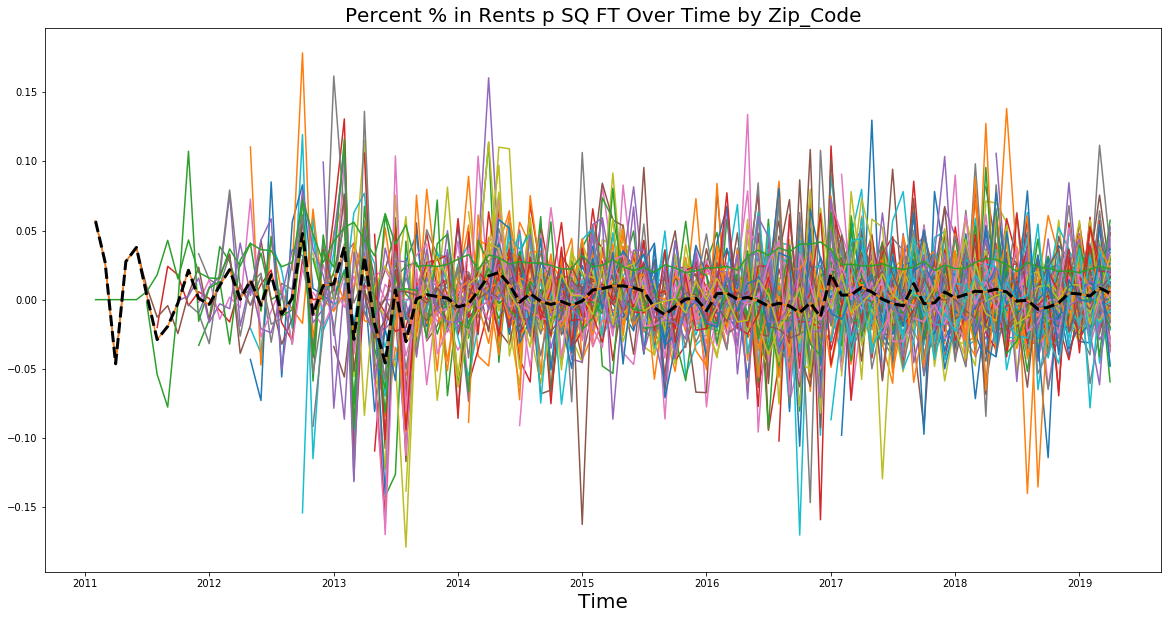

In [40]:
#plot dataset to see % change in rent p sq ft
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(df_crosspct)
plt.plot(df_crosspct['Mean'], color='black',linewidth = 3,linestyle = '--')
plt.title('Percent % in Rents p SQ FT Over Time by Zip_Code', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.savefig('pct_change_alldata_lineplot.png')
plt.show()

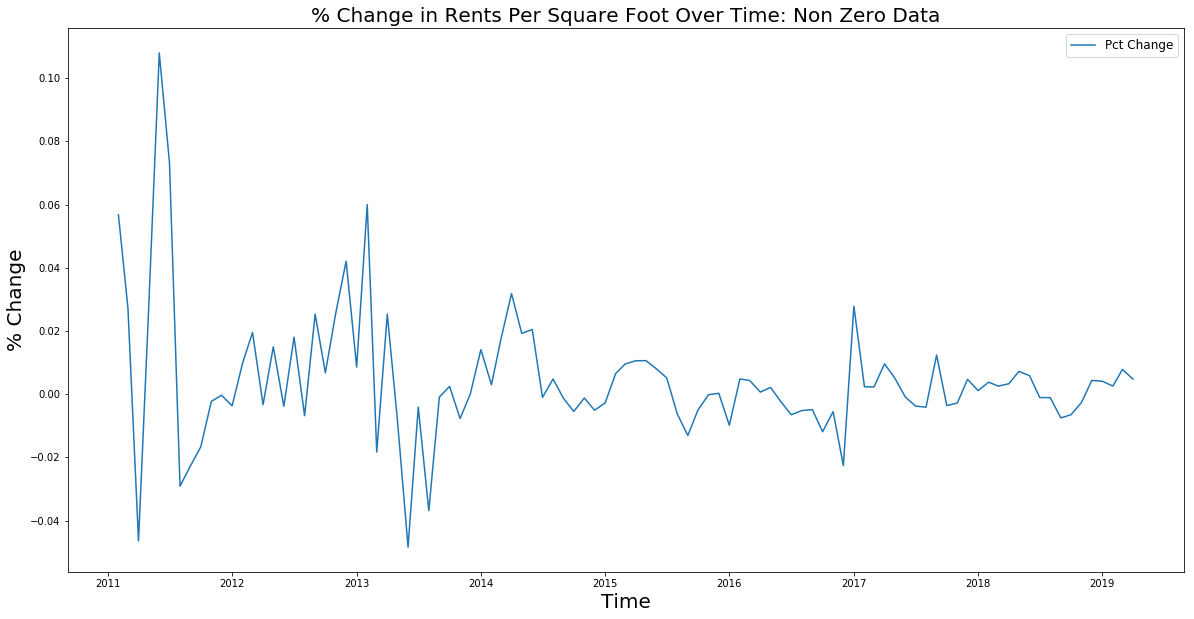

In [41]:
#plot the non zero dataset to see nominal rent per sq ft
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(df_cross['Pct Change'])
#plt.plot(df_non_zero['Mean'], color='black',linewidth = 3,linestyle = '--')
plt.title('% Change in Rents Per Square Foot Over Time: Non Zero Data', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('% Change', fontsize=20)
plt.legend(loc='upper right', fontsize=12)
plt.savefig('non_zeropctchange_lineplot.png')
plt.show()

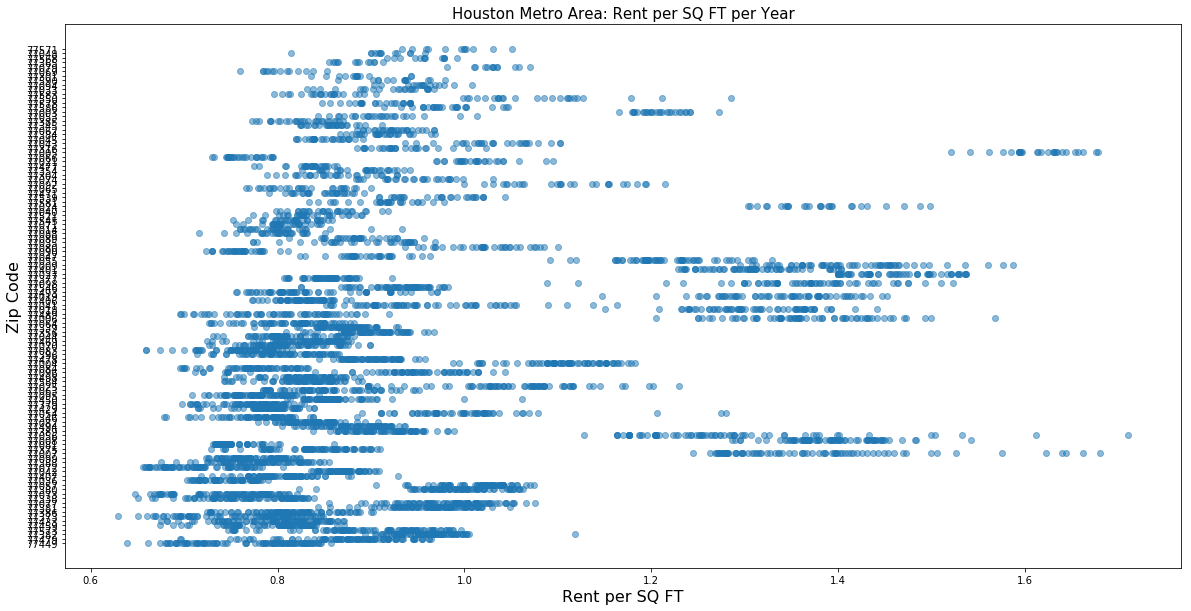

In [42]:
#Convert the cities to column values and order them by date but now look at % change
rows        = df_melted['Zip_Code']  #Set the rows by City
columns     = df_melted['Date']      #Set the columns to be the Date
values      = df_melted['RentpSQFT'] #This is the value to capture

aggregation = 'mean'                 #This is a formatliy because there is only one value per Date and Zip Code.
                                     #Therefore there is nothing to add, average, etc.
                                     #But if you don't give it an aggregation function, it will throw an error.

df_crosspct = df_melted[df_melted.RentpSQFT != 0]
df_crosspct = pd.crosstab(columns,rows, values,aggfunc=aggregation,dropna=True)

#create scatter plot to see average rents over time
y = df_melted['Zip_Code']
x = df_melted['RentpSQFT']
plt.scatter(x,y, alpha = 0.5)
plt.title("Houston Metro Area: Rent per SQ FT per Year", fontsize=15)
plt.ylabel("Zip Code", fontsize=16)
plt.xlabel("Rent per SQ FT", fontsize=16)
plt.rcParams["figure.figsize"] = [30,15]
plt.savefig('scatter_by_zip.png')
plt.show()

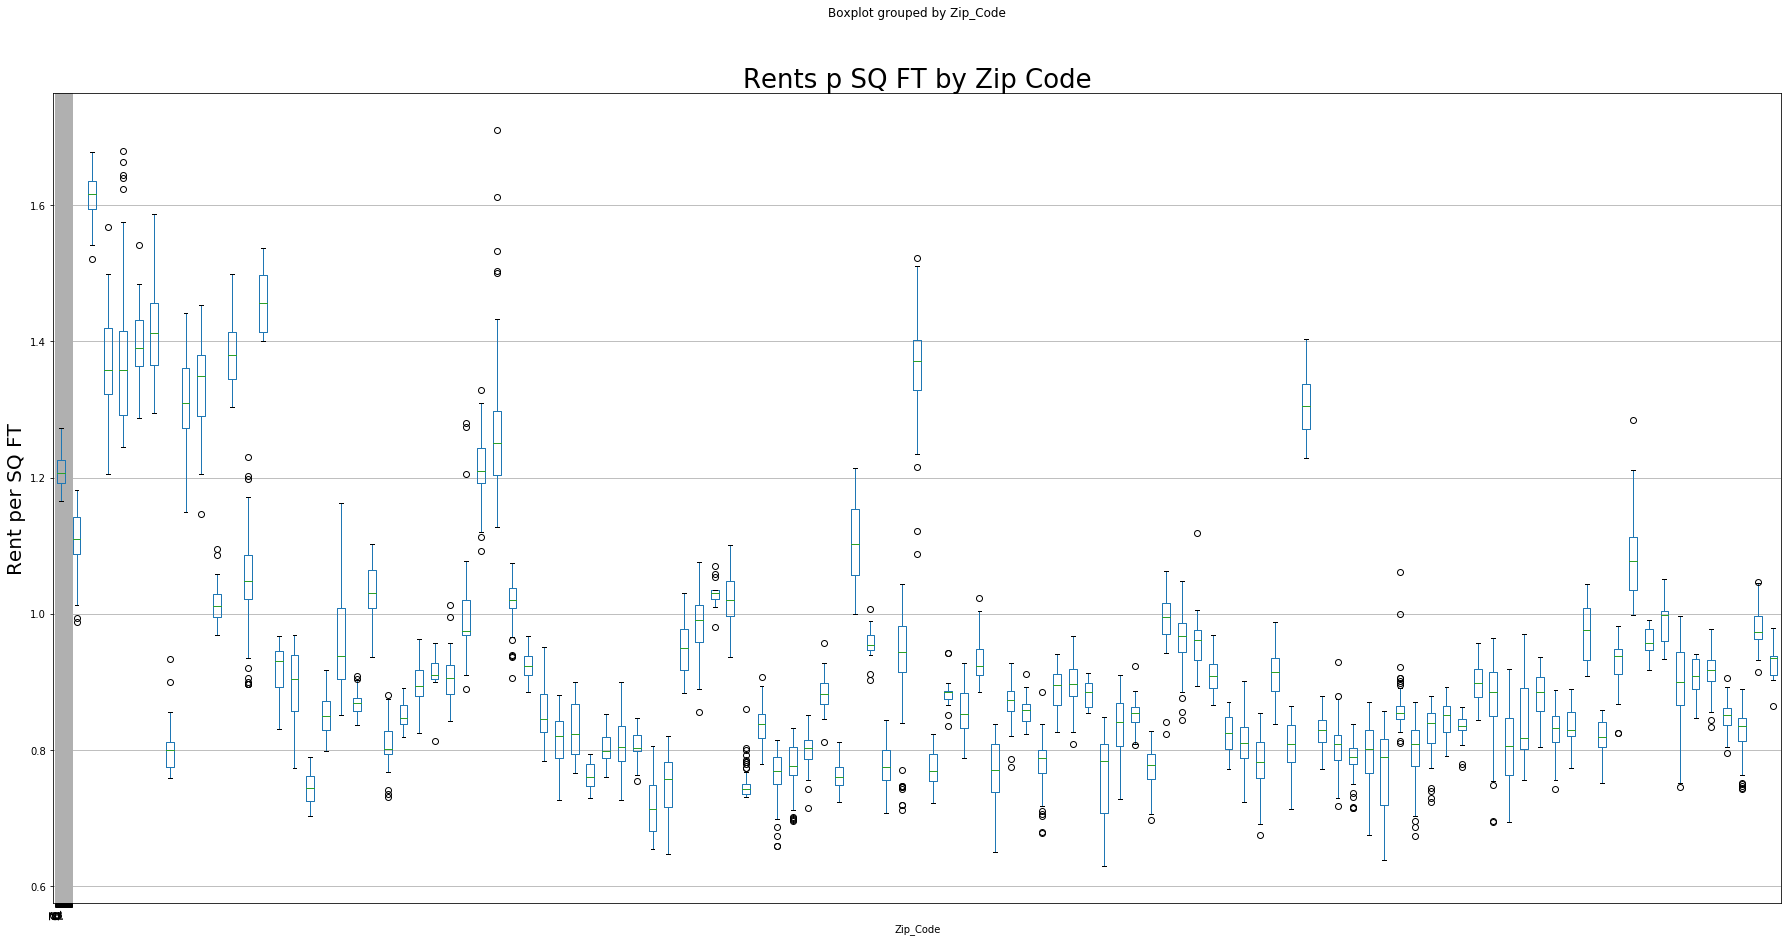

In [43]:
#boxplot of rent per sq ft by City

df_melted.boxplot(column='RentpSQFT', by='Zip_Code')
plt.rcParams["figure.figsize"] = [30,15]
plt.title('Rents p SQ FT by Zip Code', fontsize=26)
plt.ylabel('Rent per SQ FT', fontsize=20)
plt.xticks(x, 'Zip_Code', rotation='vertical', fontsize=14)
plt.savefig('all_data_boxplot.png')
plt.show()


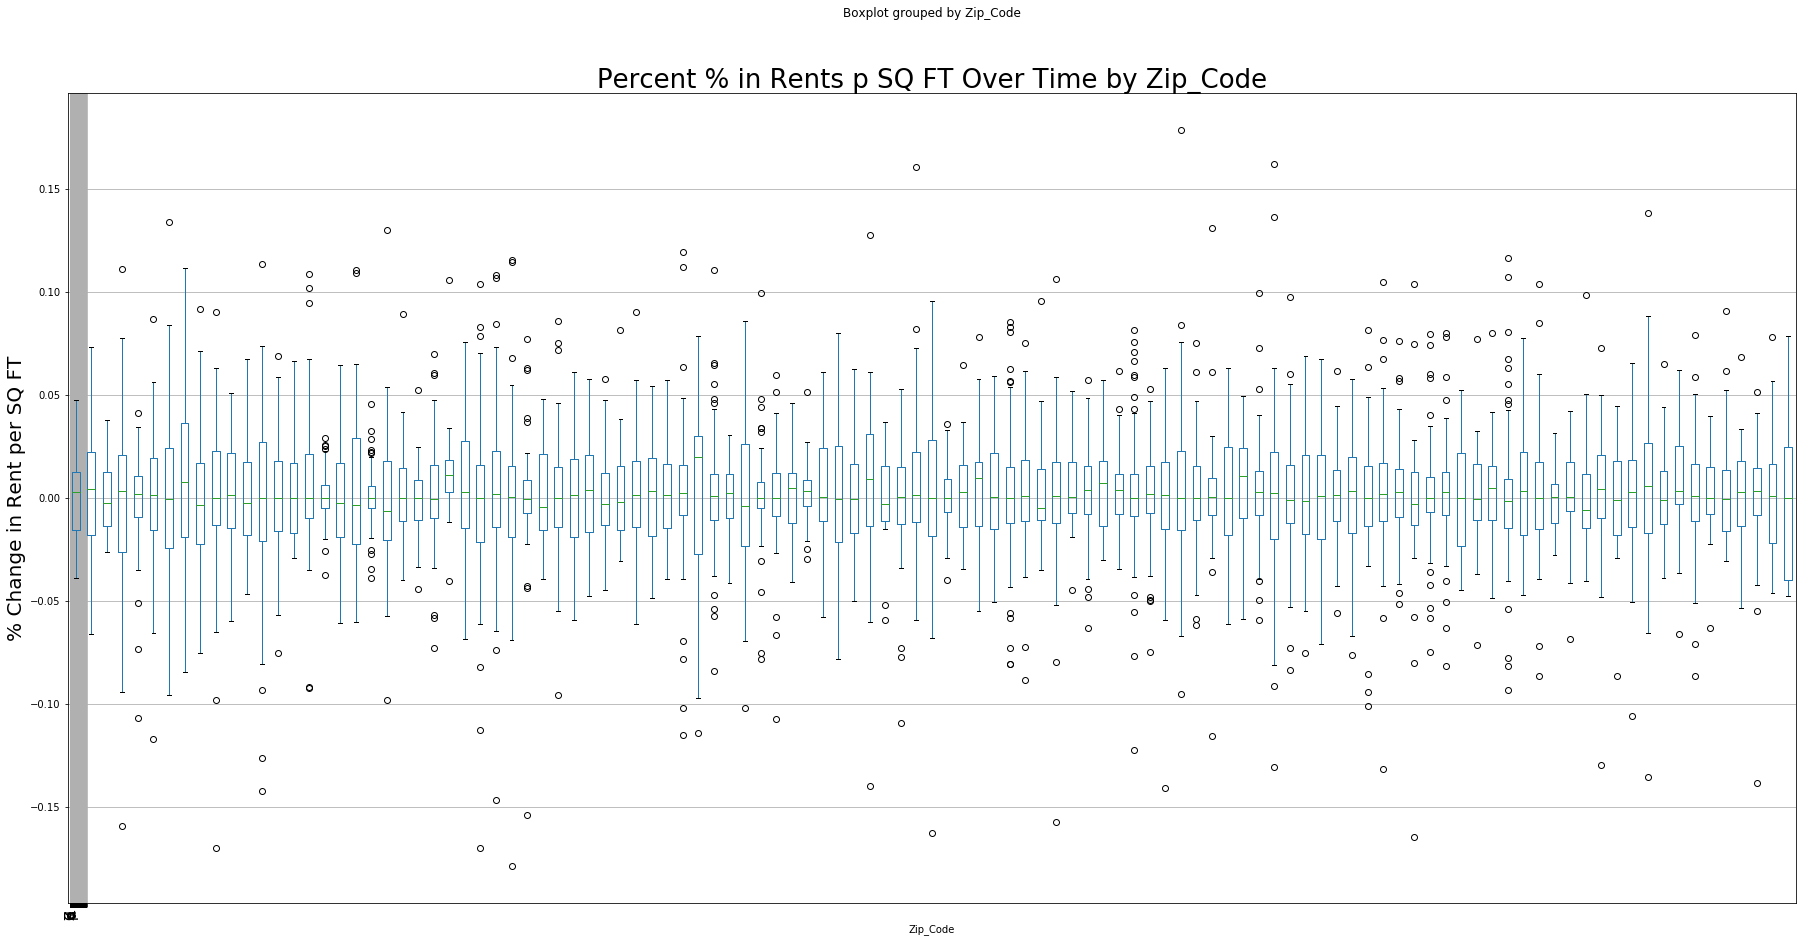

In [44]:
#boxplot of % change in rent per sq ft by City

df_melted.boxplot(column='Pct Change', by='Zip_Code')
plt.rcParams["figure.figsize"] = [30,15]
plt.title('Percent % in Rents p SQ FT Over Time by Zip_Code', fontsize=26)
plt.ylabel('% Change in Rent per SQ FT', fontsize=20)
plt.xticks(x, 'Zip_Code', rotation='vertical', fontsize=14)
plt.savefig('alldata_pctchange_boxplot')
plt.show()
